# Documentation for the creation and usage of the heatpump library (hplib)




In [2]:
import hplib as hpl
import hplib_database as db
import pandas as pd
import matplotlib.pyplot as plt

## Defintions

**Abbreviations**

| Abbreviation | Meaning |
| --- | --- |
| P_th | Thermal output power in W |
| P_el | Electical input Power in W |
| COP | Coefficient of performance |
| T_in | Input temperature in °C at primary side of the heat pump |
| T_out | Output temperature in °C at secondary side of the heat pump |
| P_th_ref | Thermal output power in W at T_in = -7 °C and T_out = 52 °C |
| P_el_ref | Elecrical output power in W at T_in = -7 °C and T_out = 52 °C |
| COP_ref | Coefficient of performance at T_in = -7 °C and T_out = 52 °C |
| p1,p2,p3 | Fit-Parameters for Fit-Function |


**Group IDs**

| Group ID | Type | Subtype |
| --- | --- | --- |
| 1 | Outdoor Air / Water | Regulated | 
| 2 | Brine / Water | Regulated | 
| 3 | Water / Water | Regulated | 
| 4 | Outdoor Air / Water | On-Off | 
| 5 | Brine / Water | On-Off | 
| 6 | Water / Water | On-Off | 

## Database Preparation
1. we downloaded all manufacturer data from https://keymark.eu/en/products/heatpumps/certified-products
2. then we unzipped the files and used the bash-skript to convert pdf into txt
3. afterwards we used this following functions to create and extent the heatpump keymark database

In [ ]:
# Import keymark data and save to csv database
db.ImportKeymarkData()
# -> this creates /output/database_keymark.csv)

In [ ]:
# Reduce to climate measurement series with average climate, delete redundant entries and save to csv sub-database
db.ReduceKeymarkData('database_keymark.csv','average')
# -> this creates /output/database_keymark_average.csv)

In [ ]:
# Normalize electrical and thermal power from the keymark database to values from setpoint T_in = -7 °C and T_out = 34 °C
db.NormalizeKeymarkData('database_keymark_average.csv')
# -> this creates /output/database_keymark_average_normalized.csv)

In [ ]:
# Identify subtypes like On-Off, Inverter and 2-stages Heatpump and assign group depending on its type and subtype
db.IdentifySubtypes('database_keymark_average_normalized.csv')
# -> this creates /output/database_keymark_average_normalized_subtypes.csv)

In [ ]:
#Calculate parameters p1-p3 for P_th, P_el and COP
db.CalculateFunctionParameters('database_keymark_average_normalized_subtypes.csv')
# -> this creates the final hplib_database.csv

In [ ]:
#Calculate generic heatpump models for each group
db.addGeneric()
# -> this overwrites the hplib_database.csv

In [ ]:
#Reduce to unique heat pump models
db.ReduceToUnique()
# -> this overwrites the hplib_database.csv

## Usage for simulation

In [2]:
# Have a look into the hplib database
database = hpl.loadDatabase()
database

,Manufacturer,Model,Date,Type,Subtype,Group,Refrigerant,Mass of Refrigerant [kg],SPL indoor [dBA],SPL outdoor [dBA],...,p3_P_th [-],p4_P_th [1/°C],p1_P_el [1/°C],p2_P_el [1/°C],p3_P_el [-],p4_P_el [1/°C],p1_COP [-],p2_COP [-],p3_COP [-],p4_COP [-]
0,Advantix,i-SHWAK V4 06,2020-05-26,Outdoor Air/Water,Regulated,1.0,R410a,2.68,35.0,64.0,...,1.284505,-1.780462,-62.931021,0.008232,0.220763,62.905465,-40.360701,-0.042594,4.862192,40.502338
1,Advantix,i-SHWAK V4 08,2020-05-26,Outdoor Air/Water,Regulated,1.0,R410a,2.20,35.0,64.0,...,0.923852,141.675167,-49.327422,0.010072,0.169398,49.303469,221.722238,-0.039243,4.806831,-221.576626
2,Advantix,i-SHWAK V4 10,2020-05-26,Outdoor Air/Water,Regulated,1.0,R410a,3.45,39.0,64.0,...,1.230384,-22.318136,141.679688,0.009813,0.193122,-141.703927,212.852441,-0.073052,6.208805,-212.682484
3,Advantix,i-SHWAK V4 12,2020-05-26,Outdoor Air/Water,Regulated,1.0,R410a,3.45,39.0,65.0,...,0.857510,142.590969,17.304168,0.011196,0.183843,-17.327386,318.330520,-0.077418,6.435352,-318.207408
4,Advantix,i-SHWAK V4 14,2020-05-26,Outdoor Air/Water,Regulated,1.0,R410a,4.40,40.0,68.0,...,0.964394,-212.774961,-97.899949,0.008636,0.220122,97.871080,208.402883,-0.059670,5.518714,-208.245752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Generic,Generic,NaN,Brine/Water,Regulated,2.0,NaN,NaN,NaN,NaN,...,0.877445,-0.034105,-0.011694,0.011694,0.167931,-0.022547,0.094477,-0.094477,7.965774,-0.002458
513,Generic,Generic,NaN,Water/Water,Regulated,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,Generic,Generic,NaN,Outdoor Air/Water,On-Off,4.0,NaN,NaN,NaN,NaN,...,1.479699,-63.598899,52.809776,0.012577,0.362294,-52.806429,60.048530,-0.060318,5.696027,-59.953197
515,Generic,Generic,NaN,Brine/Water,On-Off,5.0,NaN,NaN,NaN,NaN,...,1.294020,-0.001788,-0.015276,0.015276,0.241917,0.004298,0.103930,-0.103930,8.054636,-0.031898


In [3]:
# Define a specific heatpump model and get parameters
parameters = hpl.getParameters('i-SHWAK V4 06')
parameters

,Model,P_th_ref [W],P_el_ref [W],COP_ref,Group,p1_P_th [1/°C],p2_P_th [1/°C],p3_P_th [-],p4_P_th [1/°C],p1_P_el [1/°C],p2_P_el [1/°C],p3_P_el [-],p4_P_el [1/°C],p1_COP [-],p2_COP [-],p3_COP [-],p4_COP [-]
0,i-SHWAK V4 06,4500.0,2866.0,1.57,1.0,1.756924,-0.010648,1.284505,-1.780462,-62.931021,0.008232,0.220763,62.905465,-40.360701,-0.042594,4.862192,40.502338


In [4]:
# Alternatively, define a "Generic" heatpump model and get parameters
# For every Group ID there is a parameter set which represents an average heatpump of its group
# Please define the Type "Generic", the Group ID (1-9) and P_th_ref in W
parameters = hpl.getParameters('Generic',Group=1, T_in=0, T_out=40, P_th=10000)
parameters

,Model,P_th_ref [W],P_el_ref [W],COP_ref,Group,p1_P_th [1/°C],p2_P_th [1/°C],p3_P_th [-],p4_P_th [1/°C],p1_P_el [1/°C],p2_P_el [1/°C],p3_P_el [-],p4_P_el [1/°C],p1_COP [-],p2_COP [-],p3_COP [-],p4_COP [-]
0,Generic,6968.475639,4978.84474,1.399617,1.0,67.415115,-0.003619,0.919535,-67.445192,68.738396,0.009449,0.190328,-68.769238,46.08128,-0.087983,7.053688,-45.927145


In [14]:
# Simulate on time step
# Please define T_in_primary, T_in_secondary in °C and the parameters from the previous step 
# The T_in_secondary is supposed to be heated up by 5 K which then results in T_out
# For a time series create a loop with the function
P_th, P_el, COP, T_out, m_dot = hpl.simulate(12, 24, parameters)
print('P_th: '+str(int(P_th))+' W')
print('P_el: '+str(int(P_el))+' W')
print('COP: '+str(round(COP,3)))

P_th: 1873 W
P_el: 346 W
COP: 5.412


**Very important:** With the Fit-Parameters p1-p3 for P_th, P_el and COP it is possible to calculate the results with the following methods:

1. P_th and P_el with Fit-Functions and `COP = P_th / P_el`
2. P_th and COP with Fit-Functions and `P_el = P_th / COP`
3. P_el and COP with Fut-Functions and `P_th = P_el * COP`

While the model by Schwarmberger et. al. uses the 1. method, our validation showed, that the 3. method results in better results. Therefore we decided to implement this in the `simulate` definition.

## Examples

**Schematic plotting** of COP, P_el and P_th for an generic air/water heat pump: subtype = **On-Off** 

<bound method Figure.show of <Figure size 432x288 with 2 Axes>>

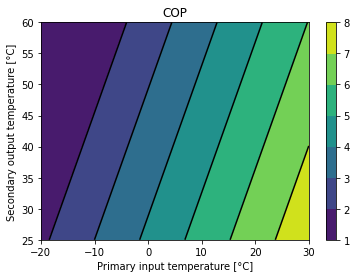

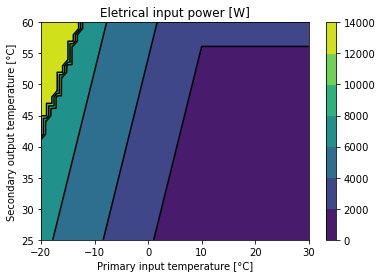

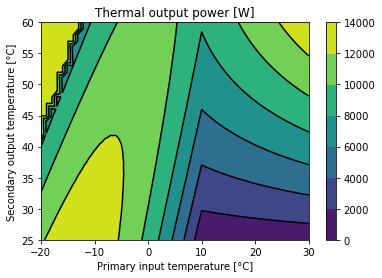

In [13]:
# Define Temperatures
T_in_primary = range(-20, 31) # air temperatur
T_in_secondary = range(20,56) # e.g. temperature from hot water storage

# Load parameters of Generic Air/Water, On-Off
parameters = hpl.getParameters('WELLEA MONOBLOC 14 KW 3PH')#,Group=4, T_in=-7, T_out=52, P_th = 5000)

# Simulate 
names = ['T_in_primary','P_th', 'P_el', 'COP', 'T_out', 'm_dot']
data = []

for t1 in T_in_primary:
    for t2 in T_in_secondary:
        P_th, P_el, COP, T_out, m_dot = hpl.simulate(t1, t2, parameters)
        data.append([t1, P_th, P_el, COP, T_out, m_dot])

results = pd.DataFrame(data, columns=names)

# Plot COP
fig1, ax1 = plt.subplots()
plot = plt.tricontourf(results['T_in_primary'], results['T_out'], results['COP'])
ax1.tricontour(results['T_in_primary'], results['T_out'], results['COP'], colors='k')
fig1.colorbar(plot)
ax1.set_title('COP')
ax1.set_xlabel('Primary input temperature [°C]')
ax1.set_ylabel('Secondary output temperature [°C]')
fig1.show

# Plot electrical input power
fig1, ax1 = plt.subplots()
plot = plt.tricontourf(results['T_in_primary'], results['T_out'], results['P_el'])
ax1.tricontour(results['T_in_primary'], results['T_out'], results['P_el'], colors='k')
fig1.colorbar(plot)
ax1.set_title('Eletrical input power [W]')
ax1.set_xlabel('Primary input temperature [°C]')
ax1.set_ylabel('Secondary output temperature [°C]')
fig1.show

# Plot thermal output power
fig1, ax1 = plt.subplots()
plot = plt.tricontourf(results['T_in_primary'], results['T_out'], results['P_th'])
ax1.tricontour(results['T_in_primary'], results['T_out'], results['P_th'], colors='k')
fig1.colorbar(plot)
ax1.set_title('Thermal output power [W]')
ax1.set_xlabel('Primary input temperature [°C]')
ax1.set_ylabel('Secondary output temperature [°C]')
fig1.show

In [3]:
df=pd.read_csv(r'output/database_keymark_average_normalized_subtypes.csv')
i=0
prev_model='first Model'
while i<len(df): 
    Model=df.iloc[i,1]
    T_amb=df.iloc[i,12]
    T_in=df.iloc[i,13]
    T_out=df.iloc[i,14]
    P_th=df.iloc[i,15]
    P_el=df.iloc[i,16]
    COP=df.iloc[i,17]
    i=i+1
    try:
        if prev_model!=Model:
            para=hpl.getParameters(Model)
        P_th_sim,P_el_sim,COP_sim,_,_=hpl.simulate(T_in,T_out-5,para,T_amb)
        df.loc[i,'P_th_sim']=P_th_sim
        df.loc[i,'P_el_sim']=P_el_sim
        df.loc[i,'COP_sim']=COP_sim
        prev_model=Model
    except:
        pass
    

In [12]:
df.to_csv(r'output/database_keymark_average_normalized_subtypes_validation.csv', encoding='utf-8', index=False)

In [9]:
df['err_P_th']=df['P_th_sim']/df['P_th [W]']-1
df['err_P_el']=df['P_el_sim']/df['P_el [W]']-1
df['err_COP']=df['COP_sim']/df['COP']-1

In [10]:
df

,Manufacturer,Model,Date,Type,Subtype,Group,Refrigerant,Mass of Refrigerant [kg],SPL indoor [dBA],SPL outdoor [dBA],...,P_el [W],COP,P_th_n,P_el_n,P_th_sim,P_el_sim,COP_sim,err_P_th,err_P_el,err_COP
0,Advantix,i-SHWAK V4 06,2020-05-26,Outdoor Air/Water,Regulated,1.0,R410a,2.68,35.0,64.0,...,1978,2.68,1.177778,0.690161,4718.108376,1947.593619,2.422532,-0.109791,-0.015372,-0.096070
1,Advantix,i-SHWAK V4 06,2020-05-26,Outdoor Air/Water,Regulated,1.0,R410a,2.68,35.0,64.0,...,2866,1.57,1.000000,1.000000,3928.103726,2372.274673,1.655838,-0.127088,-0.172270,0.054674
2,Advantix,i-SHWAK V4 06,2020-05-26,Outdoor Air/Water,Regulated,1.0,R410a,2.68,35.0,64.0,...,829,4.10,0.755556,0.289253,4618.045299,1194.020484,3.867643,0.358249,0.440314,-0.056672
3,Advantix,i-SHWAK V4 06,2020-05-26,Outdoor Air/Water,Regulated,1.0,R410a,2.68,35.0,64.0,...,915,2.95,0.600000,0.319260,4958.045220,1477.141186,3.356514,0.836313,0.614362,0.137801
4,Advantix,i-SHWAK V4 06,2020-05-26,Outdoor Air/Water,Regulated,1.0,R410a,2.68,35.0,64.0,...,867,4.15,0.800000,0.302512,3560.720086,757.018327,4.703611,-0.010911,-0.126853,0.133400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25795,WOLF,CHA-10/400V,2020-06-30,Outdoor Air/Water,Regulated,1.0,R290,3.40,NaN,53.0,...,1241,3.45,0.608819,0.368906,6787.804090,1713.430988,3.961528,0.585936,0.380686,0.148269
25796,WOLF,CHA-10/400V,2020-06-30,Outdoor Air/Water,Regulated,1.0,R290,3.40,NaN,53.0,...,540,6.89,0.529161,0.160523,4239.406564,690.357657,6.140884,0.139625,0.278440,-0.108725
25797,WOLF,CHA-10/400V,2020-06-30,Outdoor Air/Water,Regulated,1.0,R290,3.40,NaN,53.0,...,698,5.07,0.503556,0.207491,5377.283701,1006.482836,5.342648,0.519007,0.441952,0.053777
25798,WOLF,CHA-10/400V,2020-06-30,Outdoor Air/Water,Regulated,1.0,R290,3.40,NaN,53.0,...,505,7.43,0.533428,0.150119,2084.364794,287.263778,7.255926,-0.444169,-0.431161,-0.023428
